# Tutorial 

To address the issue of memory overflow in large datasets, common approaches include downsampling methods such as filtering out some cells or genes based on quality control, or randomly downsampling cells.
In this section, we will demonstrate another strategy: how to use a universal grid-based downsampling approach to solve the memory overflow problem in large-scale data. This includes the downsampling steps as well as the restoration of original resolution after alignment.

In [2]:
import sys
sys.path.append('Tutorial/')
import SABench

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import anndata as ad
from skimage import transform as trans

## Load raw slices

Here we use two slices of Xenium breast cancer data as example. On this dataset, most methods will encounter memory overflow.
We first perform grid-based downsampling on this data. You can customize the degree of downsampling: the smaller the values of nx and ny, the larger the grid size. Conversely, larger nx and ny will result in higher resolution.

In [3]:
slice_Rep1 = sc.read_h5ad('Tutorial/Data_BCA/BCA_raw_data/slice_Rep1.h5ad')
slice_Rep2 = sc.read_h5ad('Tutorial/Data_BCA/BCA_raw_data/slice_Rep2.h5ad')

slice_names_raw=['Xenium_Rep1','Xenium_Rep2']
slices_raw=[slice_Rep1,slice_Rep2]

We first visualize the original data with raw resolution.

In [4]:
def plot_slices(group,title,size1,size2,c1,c2):
    fig, axs = plt.subplots(1, 3, figsize=(20, 5))  

    axs[0].scatter(
        group[0].obsm['spatial'][:,0],
        group[0].obsm['spatial'][:,1],
        s=size1,
        linewidth=0,
        edgecolor=None,
        marker="o",
        color=c1
    )
    axs[1].scatter(
        group[1].obsm['spatial'][:,0],
        group[1].obsm['spatial'][:,1],
        s=size2,
        linewidth=0,
       edgecolor=None,
        marker="o",
        color=c2
    )
    axs[2].scatter(
        group[0].obsm['spatial'][:,0],
        group[0].obsm['spatial'][:,1],
        s=size1,
        linewidth=0,
        edgecolor=None,
        marker="o",
        color=c1
    )
    axs[2].scatter(
        group[1].obsm['spatial'][:,0],
        group[1].obsm['spatial'][:,1],
        s=size2,
        linewidth=0,
       edgecolor=None,
        marker="o",
        color=c2
    )
    axs[0].set_title(title)
 
    plt.show()

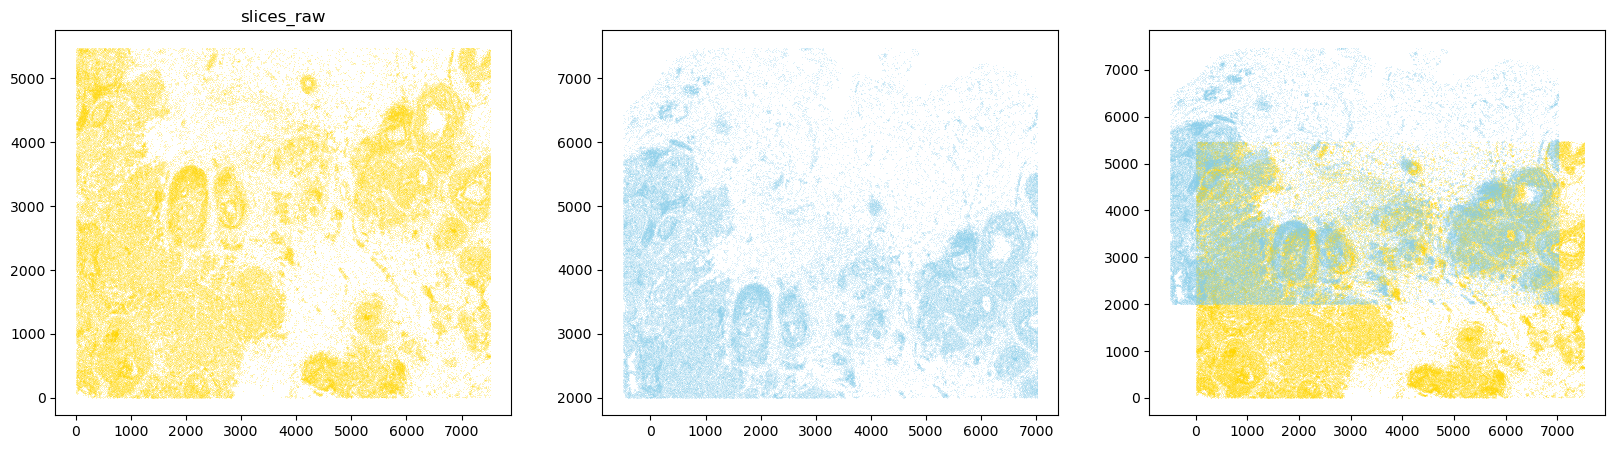

In [5]:
plot_slices(slices_raw,'slices_raw',0.1,0.1,'gold','skyblue')

## Downsample the data

Run the code below, save the downsampled data and then perform alignment using your chosen alignment method.

In [6]:
# You can experiment with various resolutions.
slice_Rep1_DR = SABench.Change_slices_resolution(slice_Rep1, 425, 425)
slice_Rep2_DR = SABench.Change_slices_resolution(slice_Rep2, 425, 425)

#slice_Rep1_DR.write_h5ad('Tutorial/Data_BCA/BCA_downsampled/slice_Rep1_DR.h5ad')
#slice_Rep2_DR.write_h5ad('Tutorial/Data_BCA/BCA_downsampled/slice_Rep2_DR.h5ad')

/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)
/home/yyz/anaconda3/envs/PASTE/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


You can now use these downsampled data at different resolutions for alignment. Any method can be applied. Here, we use STAligner as a demonstration.

## Perform resolution restoration

Load the alignment results of the downsampled data obtained using STAligner.

In [ ]:
slices_DR=[slice_Rep1_DR]+[slice_Rep2_DR]
# load aligned downsampled data
STAligner_Rep1=sc.read_h5ad('Tutorial/Data_BCA/STAligner_results_DR/STAligner_BCA_new_slices_Rep1.h5ad')
STAligner_Rep2=sc.read_h5ad('Tutorial/Data_BCA/STAligner_results_DR/STAligner_BCA_new_slices_Rep2.h5ad')
slices_results_DR=[STAligner_Rep1,STAligner_Rep2] 


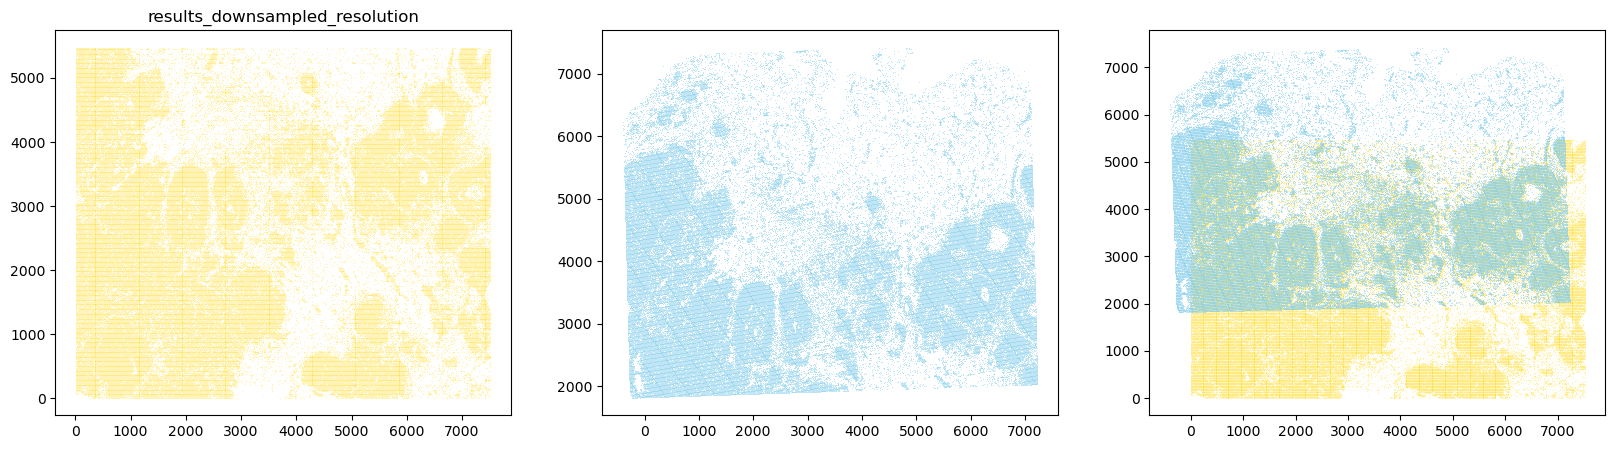

In [8]:
plot_slices(slices_results_DR,('results_downsampled_resolution'),0.1,0.2,'gold','skyblue')

Perform resolution restoration and visualization.

In [9]:
new_slices=SABench.restore_initial_slices(slices_raw,slices_DR,slices_results_DR)

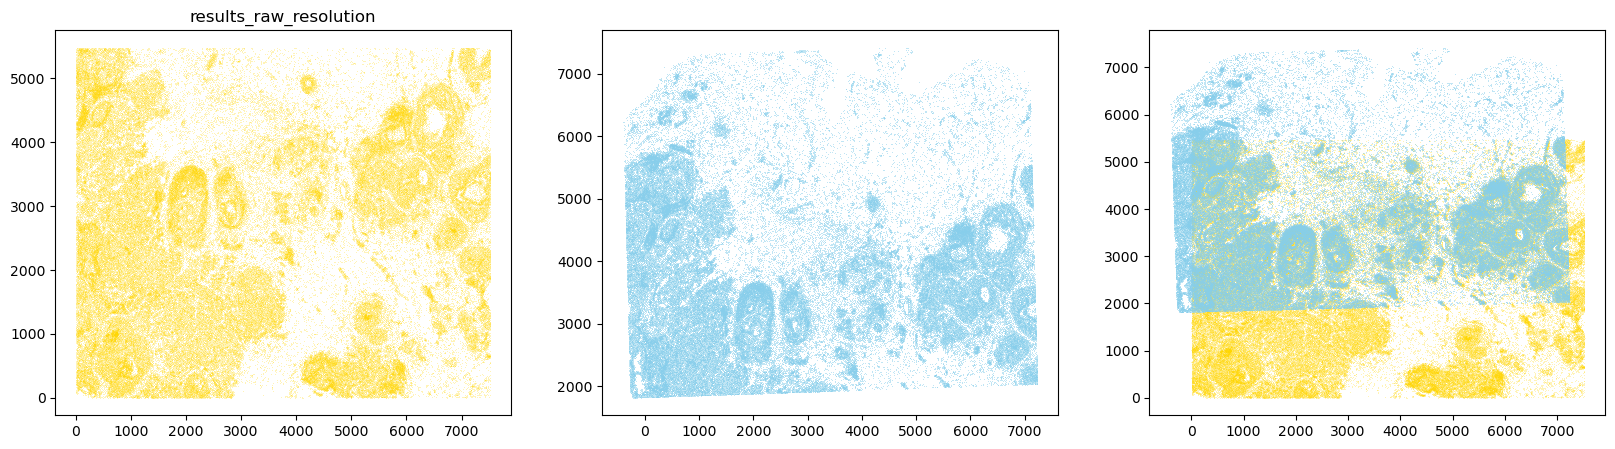

In [10]:
plot_slices(new_slices,('results_raw_resolution'),0.1,0.2,'gold','skyblue')